In [98]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import datetime as dt
import numpy as np
%matplotlib inline

In [99]:
#Importing Data from CSV Files
xlk_csv = pd.read_csv("../Project_1/xlk.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
xlf_csv = pd.read_csv("../Project_1/XLF.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
vnq_csv = pd.read_csv("../Project_1/VNQ.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
spy_csv = pd.read_csv("../Project_1/spy.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
ibb_csv = pd.read_csv("../Project_1/ibb.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
covid_data = pd.read_csv("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv", 
                         index_col="submission_date", parse_dates=True)

In [118]:
#Before Covid
xlk_pre_covid = xlk_csv.reset_index()
xlk_pre_covid = xlk_pre_covid[0:767]
xlk_pre_covid.columns = ['Date', 'XLK']

xlf_pre_covid = xlf_csv.reset_index()
xlf_pre_covid = xlf_pre_covid[0:767]
xlf_pre_covid.columns = ['Date', 'XLF']
xlf_pre_covid = xlf_pre_covid.drop(columns=['Date'])

vnq_pre_covid = vnq_csv.reset_index()
vnq_pre_covid = vnq_pre_covid[0:767]
vnq_pre_covid.columns = ['Date', 'VNQ']
vnq_pre_covid = vnq_pre_covid.drop(columns=['Date'])

spy_pre_covid = spy_csv.reset_index()
spy_pre_covid = spy_pre_covid[0:767]
spy_pre_covid.columns = ['Date', 'SPY']
spy_pre_covid = spy_pre_covid.drop(columns=['Date'])

ibb_pre_covid = ibb_csv.reset_index()
ibb_pre_covid = ibb_pre_covid[0:767]
ibb_pre_covid.columns = ['Date', 'IBB']
ibb_pre_covid = ibb_pre_covid.drop(columns=['Date'])

pre_covid_concat = pd.concat([xlk_pre_covid, xlf_pre_covid, vnq_pre_covid,
                              spy_pre_covid, ibb_pre_covid], axis = "columns", join = "inner")
pre_covid_concat.set_index(["Date"], inplace = True)
pre_covid_concat.head()

,XLK,XLF,VNQ,SPY,IBB
Date,,,,,
2017-01-03,48.79,23.51,82.80,225.24,90.08
2017-01-04,48.96,23.70,84.01,226.58,92.41
2017-01-05,49.04,23.46,84.28,226.40,92.70
2017-01-06,49.40,23.54,84.29,227.21,93.42
2017-01-09,49.39,23.38,83.53,226.46,94.76


In [132]:
#During Covid
xlk_post_covid = xlk_csv.reset_index()
xlk_post_covid = xlk_post_covid[767:]
xlk_post_covid.columns = ['Date', 'XLK']

xlf_post_covid = xlf_csv.reset_index()
xlf_post_covid = xlf_post_covid[767:]
xlf_post_covid.columns = ['Date', 'XLF']
xlf_post_covid = xlf_post_covid.drop(columns=['Date'])

vnq_post_covid = vnq_csv.reset_index()
vnq_post_covid = vnq_post_covid[767:]
vnq_post_covid.columns = ['Date', 'VNQ']
vnq_post_covid = vnq_post_covid.drop(columns=['Date'])

spy_post_covid = spy_csv.reset_index()
spy_post_covid = spy_post_covid[767:]
spy_post_covid.columns = ['Date', 'SPY']
spy_post_covid = spy_post_covid.drop(columns=['Date'])

ibb_post_covid = ibb_csv.reset_index()
ibb_post_covid = ibb_post_covid[767:]
ibb_post_covid.columns = ['Date', 'IBB']
ibb_post_covid = ibb_post_covid.drop(columns=['Date'])

during_covid_concat = pd.concat([xlk_post_covid, xlf_post_covid, vnq_post_covid,
                              spy_post_covid, ibb_post_covid], axis = "columns", join = "inner")
during_covid_concat.set_index(["Date"], inplace = True)
during_covid_concat.head()

,XLK,XLF,VNQ,SPY,IBB
Date,,,,,
2020-01-22,97.43,30.86,94.98,331.34,120.55
2020-01-23,97.89,30.78,95.78,331.72,119.50
2020-01-24,97.43,30.39,95.45,328.77,116.88
2020-01-27,95.11,29.92,94.99,323.50,116.09
2020-01-28,96.93,30.27,95.37,326.89,117.32


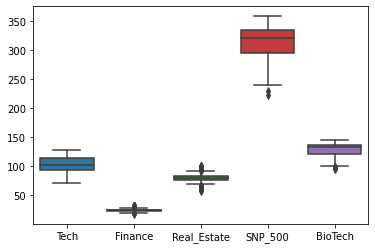

In [120]:
sns.boxplot(data = during_covid_concat)

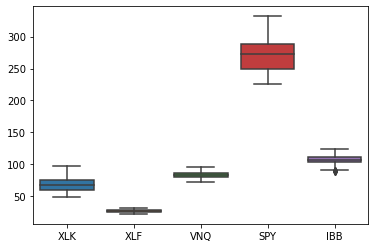

In [121]:
sns.boxplot(data = pre_covid_concat)

In [122]:
#Cleaning Covid Dataset
covid_clean_data = covid_data[["tot_cases","tot_death"]]
covid_really_clean = covid_clean_data.groupby(covid_clean_data.index).sum()
covid_really_clean.head()

,tot_cases,tot_death
submission_date,,
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,2,0
2020-01-26,5,0


In [123]:
# tot_cases; tot_death
# range dates
# delete weekends

In [124]:
covid_clean_data = covid_data[["tot_cases","tot_death"]]

In [125]:
covid_clean_data.head()

,tot_cases,tot_death
submission_date,,
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0


In [126]:
covid_really_clean = covid_clean_data.groupby(covid_clean_data.index).sum()
covid_really_clean.reset_index(inplace = True)
covid_really_clean.columns = ['Date', 'tot_cases', 'tot_death']
covid_really_clean.head()

,Date,tot_cases,tot_death
0,2020-01-22,1,0
1,2020-01-23,1,0
2,2020-01-24,2,0
3,2020-01-25,2,0
4,2020-01-26,5,0


In [127]:
covid_really_clean.set_index('Date', inplace=True)
covid_really_clean.head()



,tot_cases,tot_death
Date,,
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,2,0
2020-01-26,5,0


In [128]:
#Concat all covid data 
covid_data_impact = pd.concat([covid_really_clean, during_covid_concat], axis = 'columns',
                              join = 'inner'
                             )
covid_data_impact.head()

,tot_cases,tot_death,Tech,Finance,Real_Estate,SNP_500,BioTech
Date,,,,,,,
2020-01-22,1,0,97.43,30.86,94.98,331.34,120.55
2020-01-23,1,0,97.89,30.78,95.78,331.72,119.50
2020-01-24,2,0,97.43,30.39,95.45,328.77,116.88
2020-01-27,5,0,95.11,29.92,94.99,323.50,116.09
2020-01-28,5,0,96.93,30.27,95.37,326.89,117.32


In [129]:
#Statistical analysis of pre_covid
pre_covid_pct_change = pre_covid_concat.pct_change().dropna()
pre_covid_pct_change.head()

,XLK,XLF,VNQ,SPY,IBB
Date,,,,,
2017-01-04,0.003484,0.008082,0.014614,0.005949,0.025866
2017-01-05,0.001634,-0.010127,0.003214,-0.000794,0.003138
2017-01-06,0.007341,0.003410,0.000119,0.003578,0.007767
2017-01-09,-0.000202,-0.006797,-0.009016,-0.003301,0.014344
2017-01-10,0.000202,0.002139,-0.008500,0.000000,0.007809


In [130]:
#Standard Dev Pre-Covid
pre_covid_std = pre_covid_concat.std()
pre_covid_std

XLK    10.516747
XLF     1.948106
VNQ     5.168474
SPY    23.704108
IBB     7.084195
dtype: float64

In [131]:
#Covariance for Pre-covid for XLK
pre_covid_xlk_cov = pre_covid_concat['XLK'].rolling(window = 15).cov(pre_covid_concat['SPY']).dropna()
pre_covid_xlf_cov = pre_covid_concat['XLF'].rolling(window = 15).cov(pre_covid_concat['SPY']).dropna()
pre_covid_vnq_cov = pre_covid_concat['VNQ'].rolling(window = 15).cov(pre_covid_concat['SPY']).dropna()
pre_covid_ibb_cov = pre_covid_concat['IBB'].rolling(window = 15).cov(pre_covid_concat['SPY']).dropna()


pre_covid_var = pre_covid_concat['SPY'].rolling(window = 15).var().dropna()


pre_covid_var.head()

Date
2017-01-24    0.327160
2017-01-25    0.759335
2017-01-26    1.157169
2017-01-27    1.364727
2017-01-30    1.372660
Name: SPY, dtype: float64

In [114]:
#Calculating beta precovid
xlk_beta_pre_covid = pre_covid_xlk_cov/pre_covid_var
xlf_beta_pre_covid = pre_covid_xlf_cov/pre_covid_var
vnq_beta_pre_covid = pre_covid_vnq_cov/pre_covid_var
ibb_beta_pre_covid = pre_covid_ibb_cov/pre_covid_var
beta_pre_covid = pd.concat([xlk_beta_pre_covid, xlf_beta_pre_covid, vnq_beta_pre_covid, ibb_beta_pre_covid],
                          axis = 'columns', join = 'inner')
beta_pre_covid.columns = ['Tech', 'Finance', 'Real_Estate', 'BioTech']
beta_pre_covid.head()

,Tech,Finance,Real_Estate,BioTech
Date,,,,
2017-01-24,0.378945,0.092458,0.259659,0.589890
2017-01-25,0.363786,0.153651,0.041392,-0.443693
2017-01-26,0.352192,0.166133,0.021160,-0.542760
2017-01-27,0.364712,0.173032,-0.025382,-0.521204
2017-01-30,0.370591,0.173805,-0.046958,-0.550743


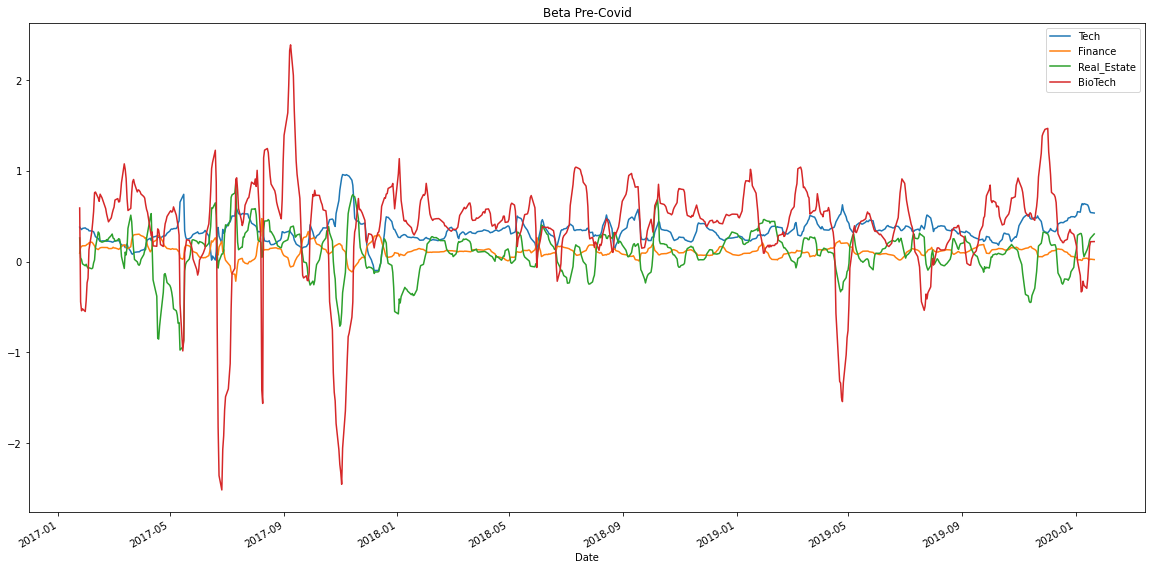

In [115]:
#Graphs
beta_pre_covid.plot(figsize = (20, 10), title = 'Beta Pre-Covid')

In [136]:
#Sharpe ratios precovid
daily_returns_precovid = pre_covid_concat.pct_change().dropna()
correlation_pre_covid = pre_covid_concat.corr()
correlation_pre_covid_sum = correlation_pre_covid.sum(axis=0).sort_values()
sharpe_ratios_precovid = (correlation_pre_covid.mean()*767) / (correlation_pre_covid.std() * np.sqrt(767))
sharpe_ratios_precovid.sort_values(ascending = False)

SPY    105.936534
XLK    104.865350
XLF     69.237603
IBB     51.402314
VNQ     37.694415
dtype: float64

In [133]:
#during-covid statistical analysis
pct_change_covid = covid_data_impact.pct_change().dropna()
pct_change_covid.head()

#Covariance and variance during Covid
during_covid_xlk_cov = during_covid_concat['XLK'].rolling(window = 15).cov(during_covid_concat['SPY']).dropna()
during_covid_xlf_cov = during_covid_concat['XLF'].rolling(window = 15).cov(during_covid_concat['SPY']).dropna()
during_covid_vnq_cov = during_covid_concat['VNQ'].rolling(window = 15).cov(during_covid_concat['SPY']).dropna()
during_covid_ibb_cov = during_covid_concat['IBB'].rolling(window = 15).cov(during_covid_concat['SPY']).dropna()

during_covid_var = during_covid_concat['SPY'].rolling(window = 15).var().dropna()

In [38]:
#Beta Values during covid
xlk_beta_covid = during_covid_xlk_cov/during_covid_var
xlf_beta_covid = during_covid_xlf_cov/during_covid_var
vnq_beta_covid = during_covid_vnq_cov/during_covid_var
ibb_beta_covid = during_covid_ibb_cov/during_covid_var

pct_change_covid = covid_really_clean.pct_change()

beta_during_covid = pd.concat([xlk_beta_covid, xlf_beta_covid, vnq_beta_covid, ibb_beta_covid],
                             axis = 'columns', join = 'inner')
beta_during_covid.columns = ['Tech', 'Finance', 'Real_Estate', 'BioTech']
beta_during_covid.head()

,Tech,Finance,Real_Estate,BioTech
Date,,,,
2020-02-11,0.410411,0.095055,0.161467,0.666586
2020-02-12,0.425731,0.089391,0.196738,0.633605
2020-02-13,0.430894,0.086937,0.227413,0.604790
2020-02-14,0.427873,0.084542,0.263264,0.577664
2020-02-18,0.410060,0.077432,0.306763,0.587163


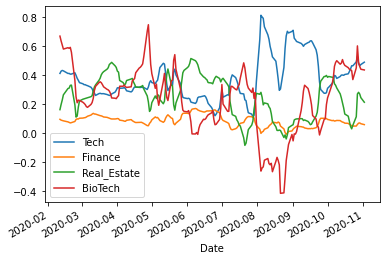

In [39]:
#plotting
beta_during_covid.plot()